# Neural Networks

This lab follows Section 11.3 of the standard textbook *The Elements of Statistical Learning* by Hastie, Tibshirani, and Friedman (2009). 

## Least-Squares Regression 

Consider an $[N \times 1]$ vector of observations, $\mathbf{y}$, taken at times $\mathbf{x}$. That is, individual observations, $y_n$, were taken at times $x_n$ for $n=1,2,3...N$. A **regression model** takes an input, $x$, and predicts an output, $f(x)$, such that it is a "best fit" to the data, $\mathbf{y}$. The "best fit" is defined as the minimum of an **objective function** (also called a **loss, penalty, error, or cost function**). A common objective function is the sum of the data-model mismatch (also called the residuals or errors) squared
\begin{equation}
R(\boldsymbol\theta)=\sum_{n=1}^N \left[y_n-f(x_n)\right]^2 = \left[\mathbf{y}-\mathbf{f}\right]^T \left[\mathbf{y}-\mathbf{f}\right]\tag{1}
\end{equation}
where $\mathbf{f}=f(\mathbf{x})$ and $\boldsymbol\theta$ is a column vector of parameters that determine the mapping from $x$ to $f(x)$. Fitting *any* type of model using (1) is called a "least-squares regression" or "least-squares fit".

## Linear and Nonlinear Regression Models 

Most regression models are *linear* with respect to $\boldsymbol\theta$ so that predictions may be written
\begin{equation}
\mathbf{A}\boldsymbol{\theta} = \mathbf{f} \tag{2}
\end{equation}
where $\mathbf{A}$ is some matrix of constants that depends on $\mathbf{x}$ ($\mathbf{x}$ usually appears as the argument to a polynomial or trig function). The key point is that fitting (2) is called **linear regression** because the prediction is linear with respect to the fitting parameters, *not* because we are specifically fitting a linear trend (e.g., $f(x)=\theta_1+\theta_2 x$). For example, "linear regression" includes fitting models such as
\begin{align}
f(x)=\theta_1 + \theta_2 x + \theta_3 x^2 &&\mathrm{and}&&
f(x)=\theta_1 \cos(\omega x) + \theta_2 \sin(\omega x) \;,\nonumber
\end{align}
that are nonlinear in $x$, but linear in $\theta$. (Note: the second model above is known as *harmonic analysis*). In contrast, a model such as  
\begin{equation}
f(x)=\theta_1 + \theta_2 \sin(\theta_3 x + \theta_4) \tag{3}
\end{equation}
is *nonlinear* and fitting $\boldsymbol\theta=[\theta_1,\; \theta_2,\; \theta_3,\; \theta_4]^T$ constitutes **nonlinear regression**. 

## Iteratively Minimizing an Objective Function 

For linear regression models, one can often solve for the fit parameters ($\boldsymbol\theta$) directly. See the derivation of the adjoint equation in the Data Assimilation Lab, or quickly look up the formulas for fitting a slope and intercept to data. For least-squares objective functions, the direct formulas for $\boldsymbol\theta$ are known as the **normal equations**.

Non-linear regression models typically require a numerical algorithm to find the minimum of the objective function. One general method, with many variants, is called **gradient descent**. The parameters, $\boldsymbol\theta$, are initiated with rough guesses or random numbers. Then the following steps are repeated until $R(\boldsymbol\theta)$ has reached a plateau:
1. Compute the model prediction &mdash; estimate $\mathbf{f}$ from the parameters, $\boldsymbol\theta^i$, where $i$ is the current iteration.  
2. Evaluate the objective function, $R(\boldsymbol\theta^i)$.
3. Descend the objective function's gradient &mdash; estimate the partial derivatives of the objective function with respect to $\boldsymbol\theta^i$. Then update each parameter by moving downhill (toward the objective function minimum)
\begin{equation}
\boldsymbol\theta^{i+1} = \boldsymbol\theta^i-\gamma_r \frac{\partial R}{\partial \boldsymbol\theta^i} \tag{4}
\end{equation}
where $\gamma_r$ is a tuning parameter (step size) that can be increased for faster convergence or decreased for stability (i.e., to prevent overshooting a minimum). Note that $\partial R/\partial \boldsymbol\theta$ is "matrix calculus notation" and can be interpreted as a column vector with the $j$-th entry given by $ \partial R/ \partial \theta_j$.

## Nonlinear Regression to a Set of Oscillations 

When $f(x)$ and $R(\boldsymbol\theta)$ aren't too complicated, we can write down explicit formulas for each gradient descent iteration. Consider fitting $M$ oscillations using the model (3) above. The iteration becomes:
1. Compute the prediction:  
\begin{equation}
f^i(\mathbf{x})= \beta_0^i + \sum_{m=1}^M \beta_m^i \sin(\alpha_m^i \mathbf{x} + \alpha_{0,m}^i) \tag{5}
\end{equation}
where the full collection of fitting parameters ($\boldsymbol\theta$) has been divided into $[M \times 1]$ vectors $\boldsymbol\alpha$, $\boldsymbol\alpha_0$, and $\boldsymbol\beta$, as well as the constant $\beta_0$. Physically, $\boldsymbol\alpha$ are the frequencies, $\boldsymbol\alpha_0$ are the phases, and $\boldsymbol\beta$ are the amplitudes. The offset or "bias", $\beta_0$, is a standard feature of (almost) all regression models.  
2. Evaluate the objective function:
\begin{equation}
R^i=\sum_{n=1}^N \left[y_n-f^i(x_n)\right]^2 \tag{6}
\end{equation}
3. Descend the objective function's gradient: Finding the partial derivatives requires extensive use of the chain rule
\begin{align}
\frac{\partial R}{\partial\beta_0^i} &= \sum_{n=1}^N 2\left[y_n-f^i(x_n)\right] \frac{-\partial{f}}{\partial \beta_0^i}=\sum_{n=1}^N -2\left[y_n-f^i(x_n)\right] \tag{7a}\\
\frac{\partial R}{\partial\beta_m^i} &= \sum_{n=1}^N 2\left[y_n-f^i(x_n)\right] \frac{-\partial{f}}{\partial \beta_m^i}=\sum_{n=1}^N -2\left[y_n-f^i(x_n)\right]\sin(\alpha_m^i x_n + \alpha_{0,m}^i) \tag{7b}\\
\frac{\partial R}{\partial\alpha_{0,m}^i} &= \sum_{n=1}^N 2\left[y_n-f^i(x_n)\right] \frac{-\partial{f}}{\partial \alpha_{0,m}^i}=\sum_{n=1}^N -2\left[y_n-f^i(x_n)\right]\beta_m^i\cos(\alpha_m^i x_n + \alpha_{0,m}^i) \tag{7c}\\
\frac{\partial R}{\partial\alpha_{m}^i} &= \sum_{n=1}^N 2\left[y_n-f^i(x_n)\right] \frac{-\partial{f}}{\partial \alpha_{0,m}^i}=\sum_{n=1}^N -2\left[y_n-f^i(x_n)\right]\beta_m^i\cos(\alpha_m^i x_n + \alpha_{0,m}^i) x_n \tag{7d}
\end{align}
then the parameters are easily updated
\begin{align}
\beta_0^{i+1} &= \beta_0^{i}-\gamma_r \frac{\partial R}{\partial\beta_0^i} \tag{8a}\\
\boldsymbol\beta^{i+1} &= \boldsymbol\beta^i-\gamma_r \frac{\partial R}{\partial \boldsymbol\beta^i} \tag{8b}\\
\boldsymbol\alpha_0^{i+1} &= \boldsymbol\alpha_0^i-\gamma_r \frac{\partial R}{\partial \boldsymbol\alpha_0^i} \tag{8b}\\
\boldsymbol\alpha^{i+1} &= \boldsymbol\alpha^i-\gamma_r \frac{\partial R}{\partial \boldsymbol\alpha^i} \tag{8b}
\end{align}

Inspection of the method suggests $\beta_0$ should be initialized to the observation mean, and $\boldsymbol\beta$, $\boldsymbol\alpha$, and $\boldsymbol\alpha_0$ should be initialized with best guesses of the amplitude, frequency, and phases of the oscillations, or with random variables within a reasonable range. 

## The Neural Network 

The above nonlinear regression is a "vanilla neural network", or "single hidden layer back-propagation network" or "single layer perceptron". "Domain knowledge" of physics and standard numerical methods often feels passé amongst the AI hype. This section is devoted to obfuscating that knowledge. Let us begin: 

1. Neural networks are generalized to take in multiple types of inputs and predict multiple types of outputs. Our model is a special case with $F=1$ types of input ($x_n$) and $K=1$ types of output ($y_n$). 
2. The number of functions that are fit, $M$, is known as the number of **hidden units**.  
3. The regression model is nonlinear because of the trig function $\sin(\nu)$, which is specific choice for the **activation function**, $\sigma(\nu)$. Nonlinearity can also be added via an output function, $g(\nu)$, which provides a final transformation to produce $f(\mathbf{x})$.    
4. Drawing lines between the inputs, hidden units, and outputs creates a network diagram that looks like a **neural network** where *hidden units are neurons* and *connecting lines are synapses*. Originally, neurons were "activated" (fired) based on a step function for $\sigma(\nu)$ and $g(\nu)$ that either evaluated to 1 or 0. 
5. Nonlinear functions can be nested to add hidden layers to the neural network. For example, $f(x)=\boldsymbol\beta \sin( \boldsymbol\alpha_2 \sin( \boldsymbol\alpha_1 x) )$ has *two* hidden layers. 

Our method may now be stated in neural network parlance. Each iteration is an **epoch** (because it uses all the data to update the error function). The algorithm is:
1. The **forward pass** &mdash; evaluate $f(\mathbf{x})$ using 
\begin{align}
\mathbf{z}_m &=\sigma\left(\alpha_{0,m} + \alpha_m \mathbf{x}\right) \tag{9a}\\
\mathbf{T}&=\beta_0 + \sum_{m=1}^M \beta_m \mathbf{z}_m \tag{9b} \\
f(\mathbf{x})&=g(\mathbf{T}) \tag{9c}
\end{align}
where $\mathbf{T}$ is the "output vector", $g(\mathbf{T})=\mathbf{T}$ is the "output function", $\mathbf{Z}_m$ are the "derived features" or "hidden units", and $\sigma(\nu)=\sin(\nu)$ is the "activation function".
2. Compute the **error function** &mdash; evaluate (6) as before
3. The **backward pass** &mdash; evaluate the "back-propagation equations" using the "delta rule":
\begin{align}
\beta_0^{i+1} &= \beta_0^{i+1}-\gamma_r \sum_{n=1}^N \delta_n^i \tag{10a}\\
\beta_m^{i+1} &= \beta_m^i-\gamma_r \sum_{n=1}^N \delta_n^i z_{m,n}^i \tag{10b}\\
\alpha_{0,m}^{i+1} &= \alpha_{0,m}^i-\gamma_r \sum_{n=1}^N s_{m,n}^i \tag{10b}\\
\alpha_m^{i+1} &= \alpha_m^i-\gamma_r \sum_{n=1}^N s_{m,n}^i x_n \tag{10b}
\end{align}
where
\begin{align}
\delta_n^i&=-2\left[y_n-f^i(x_n)\right] \tag{11a}\\
s_{m,n}^i&=\delta_n^i\beta_m^i\sigma'(\alpha_m^i x_n + \alpha_{0,m}^i) \tag{11b}
\end{align}
with $\sigma'(\nu) = \cos(\nu)$, and $\gamma_r$ now called the **learning rate**. 

Our regression equations now, apparently, simulate an artificial brain. Let us continue to use ours by remembering that we are still fitting the amplitude, frequency, and phase of oscillations by minimizing a quadratic function using its partial derivatives.   

## Part 1: The physical model 

Today we will continue to analyze the system introduced in the Data Assimilation Lab. Our object's position is governed by a damped, forced harmonic oscillator
\begin{equation}
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2} + \gamma \frac{\mathrm{d} x}{\mathrm{d}x} + \omega_0^2 x = f(t) \tag{12}
\end{equation}
where $\gamma$ is the damping factor and $\omega_0$ is the natural frequency. The initial conditions are $x(0)=x_0$ and $dx/dt(0)=v_0$. The unknown forcing, $f(t)$, may represent an unmeasured external force or an error in the forces on the left-hand-side. 

The model is solved numerically by discretizing the time grid as $t_n = n \Delta t$ for $n=0,1,2,...N_t$ and using second-order accurate centered finite differences in the matrix $\mathbf{A}$, such that 
\begin{equation}
\mathbf{A}\mathbf{x}=\mathbf{f} \tag{13}
\end{equation}

Following the Data Assimilation Lab, a "true" forcing vector $\mathbf{f}_T$ is defined with a couple of Gaussian humps. This vector is used to find the true state $\mathbf{x}_T$. A synthetic dataset is then created by measuring $\mathbf{x}_T$ at $N$ random locations and adding Guassian noise, $\epsilon_n\sim N(0,\sigma_d^2)$, where $\sigma_d$ is the standard error of the measurements. 

## Task: Familiarize Yourself With the Physical Model

Experiment with the code below by generating various different state vectors ($\mathbf{x}_T$) and accompanying datasets ($\mathbf{d}$).


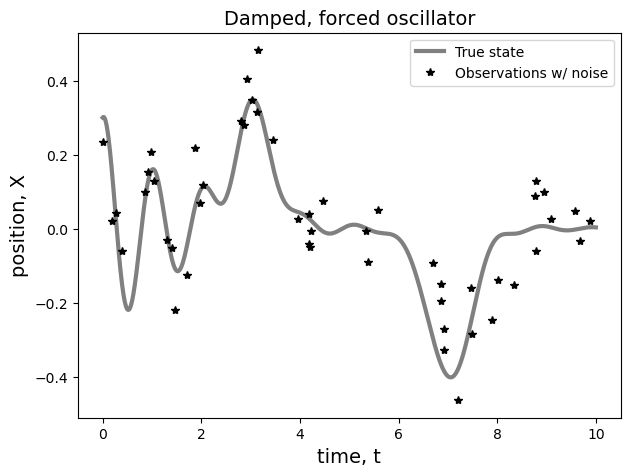

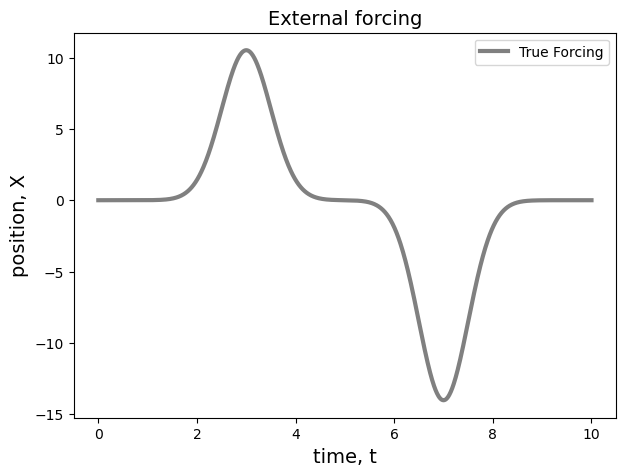

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()  
np.random.seed(1)

# Model parameters
T0=10
Nt=1000
omega0=2*np.pi;
gamma=omega0/5.0
#gamma=0.0
x0=.3
v0=.2

# Time grid
t=np.linspace(0,T0,Nt)
dt=t[1]-t[0]

# Define the linear operator A so that the damped harmonic oscillator is Ax=f
def calc_A(t,omega0,gamma):
    
    # Compute N and dt
    Nt=len(t)
    dt=t[1]-t[0]

    # Initiate A
    A=np.zeros((Nt,Nt))

    # 1st equation is just x0=x0 
    A[0,0]=1
    
    # 2nd equation uses (x_1-x_0)/(2*dt)=v0 in both the 2nd derivative and gamma term 
    A[1,0]=-2/(dt**2)+omega0**2
    #A[1,1]= 2/(dt**2)
    A[1,1]= 2/(dt**2)

    # Define additional equations using centered differences 
    for i in range(2,Nt):
        A[i,i]  = 1/(dt**2)+gamma/(2*dt)
        A[i,i-1]=-2/(dt**2)+omega0**2
        A[i,i-2]= 1/(dt**2)-gamma/(2*dt)

    return A

# Define the forcing vector that includes the boundary conditions
f0=np.zeros(Nt);
f0[0]=x0 # 1st equation uses x0=x0 
f0[1]=v0*(2/dt-gamma) # 2nd equation uses v0 

################################################################################
# Define a true state to "observe"

# Set the overall amplitude of the forcing correction
sigmaF=0.5*abs(x0)*omega0**2 

# Set the width fo the peaks (in time)
sigmaT=0.5*(2*np.pi/omega0) 
#sigmaT=0.0

# Define the "true forcing"
fT=sigmaF**2*(0.3*np.exp(-1/2*((t-0.3*T0)/sigmaT)**2)-0.4*np.exp(-1/2*((t-0.7*T0)/sigmaT)**2))
fT[0]=0

# Use the true forcing to define a "true state"
A=calc_A(t,omega0,gamma)
xT=np.linalg.solve(A,f0+fT)

################################################################################
# Create a synthetic dataset from the true state

# Number of observations 
N=50

# Standard deviation of observation noise
sigmad=.1
#sigmad=0.0

# Define the observation operator:
# 1. pick M random indices to sample between 0 and N
ind=np.round(np.random.uniform(0,Nt-1,N)).astype(int)

# 2. find the times of the observations
to=np.zeros(N)
for i in range(N):
    to[i]=t[ind[i]]

# 3. Compute the matrix L such that d=Lx is a vector of observations at the M random locations 
L=np.zeros((N,Nt))
for i in range(N):
    L[i,ind[i]]=1 

# 4. Measure the state and add Gaussian noise with standard deviation sigmaD
d=L@xT+np.random.normal(loc=0, scale=sigmad, size=N )

################################################################################
# Plot
fig = plt.figure(1,figsize=(7, 5), dpi=100)
plt.clf()
ax = fig.gca()
plt.plot(t,xT,'-',color='gray',label='True state',linewidth=3)
plt.plot(to,d,'k*',label='Observations w/ noise',ms=6)
plt.title(r'Damped, forced oscillator', fontsize=14)
plt.xlabel('time, t', fontsize=14)
plt.ylabel('position, X', fontsize=14)

plt.legend(loc='upper right')

plt.show()

fig = plt.figure(2,figsize=(7, 5), dpi=100)
plt.clf()
ax = fig.gca()
plt.plot(t,fT,'-',color='gray',label='True Forcing',linewidth=3)
plt.title(r'External forcing', fontsize=14)
plt.xlabel('time, t', fontsize=14)
plt.ylabel('position, X', fontsize=14)

plt.legend(loc='upper right')

plt.show()



## Part 2: Tuning the Neural Network?

I have implemented a neural network using (9)-(11) above. The notation of Hastie et al. (2009) clashes with our physical model, so note that the observations are now defined $\mathbf{Y}=\mathbf{d}$ with times $\mathbf{X}=\mathbf{t}_{obs}$. Predictions of $\mathbf{x}_T$ for all time $\mathbf{t}$ are now $\mathbf{Y}_p$ at times $\mathbf{X}_p$. The number of observation is $N$ and the number of neurons is $M$. 

*Tuning* a neural network is an *art* according the *The Elements of Statistical Learning* by Hastie et al. (2009). One is required to choose the number of **hidden features (neurons)**, the number of **epochs**, the **learning rate**, and the **initial values** for the parameters. Moreover, it is common to normalize the times to the range $X\in [-1,\; 1]$ and data, $Y$, to have zero mean and a standard deviation of $\sigma_y=1$. 

Additionally, one must choose the **activation function**. "Traditional" activation functions are $\sigma(\nu)=1/(1+e^{-\nu})$ and $\sigma(\nu)=\tanh(\nu)$, but I suggest $\sigma(\nu)=\sin(\nu)$. Why? 

Finally, one must choose the form of the **error function**. Notice that our error function in the Data Assimilation Lab balanced minimizing the model forcing correction with minimizing the data-model error. Here, our error function (6) only penalizes the data-model error. What does that mean when fitting data with measurement noise?  

## Task: Tune the Neural Network

Experiment with the many options discussed above and try including other modifications you find in the literature or on the internet. Find your optimal tuning, and convince yourself why it works. 

Hint 1: My progress was mysterious and slow while following advice from the AI literature, but extremely rapid once I thought about the physics.  

Hint 2: Start by fitting data generated with no damping, no external forcing, and no noise. Examine your parameters to see if they converge to the predicted values.  


Epoch 0, Loss: 123.789663
Epoch 100, Loss: 4.465081
Epoch 200, Loss: 3.237510
Epoch 300, Loss: 2.667483
Epoch 400, Loss: 2.305839
Epoch 500, Loss: 2.061268
Epoch 600, Loss: 1.891364
Epoch 700, Loss: 1.771245
Epoch 800, Loss: 1.684982
Epoch 900, Loss: 1.622010


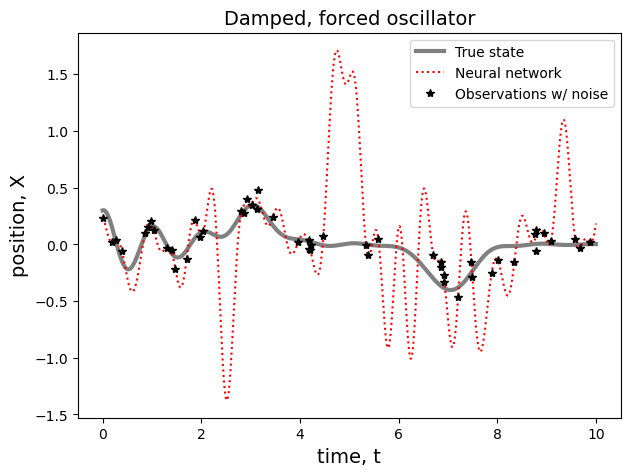

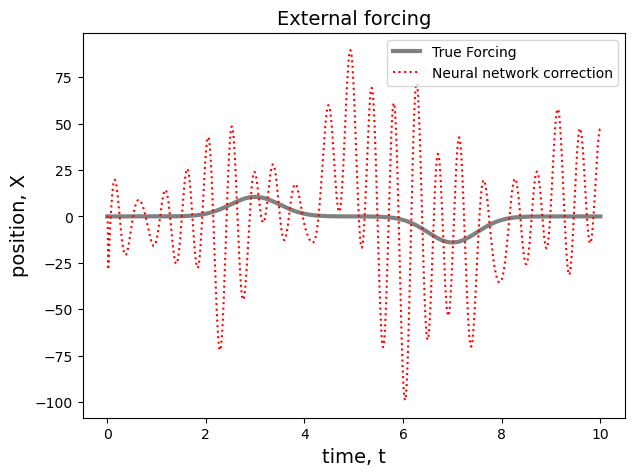

In [3]:
# Neural network parameters 
M=100            # Number of derived features (aka neurons)
num_epochs=1000 # Number of epochs
gamma_r=1e-1 # Learning rate

# Specify the input parameter (observation times), scale to be [-1 1]
X=2*to/T0-1 

# Specify the observational data to be fit, normalized
Y=(d-d.mean())/d.std()

# Initiate unknown parameters "weights"
alpha=np.random.uniform(-0.7,0.7, M)        
alpha0=np.random.uniform(-0.7,0.7, M)   
beta=np.random.uniform(-0.7,0.7, M)   
beta0=0.0                       

# Define the activation function
def sigma(v):
    #return (1+np.exp(-v))**(-1)
    #return np.tanh(v)
    return np.sin(v)

# Define the activation function derivative
def sigma_prime(v):
    #return np.exp(-v)*(1+np.exp(-v))**(-2)
    #return 1 - np.tanh(v)**2
    return np.cos(v)


# Define the output function (an identity function is standard for regression)
def g(T):
    return T 

def g_prime(T):
    return 1 

# Start fitting procedure
for epoch in range(num_epochs):
    
    # Forward pass 
    Z=np.zeros((M,N))
    for m in range(M):
        Z[m,:]=sigma(alpha0[m]+alpha[m]*X)
    T=beta0+beta.T@Z    
    f=g(T) 
    
    # Compute error function 
    R=np.sum((Y-f)**2)

    # Backward pass
    
    # Output layer derivative 
    delta=-2*(Y-f)*g_prime(T) 

    # Hidden layer derivative 
    s=np.zeros((M,N))
    for m in range(M):
        s[m,:]=delta*beta[m]*sigma_prime(alpha0[m]+alpha[m]*X)

    # Update weights by moving down gradient toward the minimum
    beta0=beta0-gamma_r*np.sum(delta)/N
    for m in range(M):
        beta[m]=beta[m]-gamma_r*np.sum(Z[m, :]*delta)/N
        alpha[m]=alpha[m]-gamma_r*np.sum(s[m, :]*X)/N
        alpha0[m]=alpha0[m]-gamma_r*np.sum(s[m, :])/N

    # Print progress every 500 epochs
    if epoch%100==0:
        print("Epoch %d, Loss: %.6f" % (epoch, R))

# Prediction Y for all times
Xp=2*t/T0-1
Z=np.zeros((M,len(Xp)))  
for m in range(M):
    Z[m,:]=sigma(alpha0[m]+alpha[m]*Xp)
T=beta0+beta.T@Z    
Yp=g(T)

# Un-normalize
Yp=Yp*d.std()+d.mean()

# Compute inferred forcing 
fc=A@Yp-f0
fc[0:2]=0

################################################################################
# Plot
fig = plt.figure(1,figsize=(7, 5), dpi=100)
plt.clf()
ax = fig.gca()
plt.plot(t,xT,'-',color='gray',label='True state',linewidth=3)
#plt.plot(t,xF,'b--',label='Forward model')
plt.plot(t,Yp,'r:',label='Neural network')
plt.plot(to,d,'k*',label='Observations w/ noise',ms=6)
plt.title(r'Damped, forced oscillator', fontsize=14)
plt.xlabel('time, t', fontsize=14)
plt.ylabel('position, X', fontsize=14)

plt.legend(loc='upper right')

plt.show()

fig = plt.figure(2,figsize=(7, 5), dpi=100)
plt.clf()
ax = fig.gca()
plt.plot(t,fT,'-',color='gray',label='True Forcing',linewidth=3)
plt.plot(t,fc,'r:',label='Neural network correction')
plt.title(r'External forcing', fontsize=14)
plt.xlabel('time, t', fontsize=14)
plt.ylabel('position, X', fontsize=14)

plt.legend(loc='upper right')

plt.show()
